# **Table of Contents** 
    1.Gathering
    2.Assessing
    3.Observations
    4.Cleaning
## Project Details
Data wrangling, which consists of:
 1.Gathering data
     -From 'twitter-archive-enhanced.csv' file.
     -From a link.
     -From twitter API.
 2.Assessing data
 3.Cleaning data
 4.Storing, analyzing, and visualizing your wrangled data
# *Reporting on*
 data wrangling efforts.
 your data analyses and visualizations

In [1]:
#Import libararies
import pandas as pd
import tweepy
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from tweepy import OAuthHandler
import json
import os
from timeit import default_timer as timer

# **Gathering**

In [2]:
#load twitter archive file into pandas df.
twitter_arch_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
#data from twitter API Using Udacity Provided Template
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_arch_df.tweet_id.values
len(tweet_ids)

def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [4]:
#read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        data = json.loads(line)
        keys = data.keys()
        user = data.get('user')
        id_str = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        df_list.append({'id_str': id_str,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [5]:
tweet_count = pd.DataFrame(df_list, columns = ['id_str', 'retweet_count', 'favorite_count'])

In [6]:
#download image predictions file.
folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [7]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [8]:
# load image predictions file into pandas df.
image_pred = pd.read_csv('image_pred/image-predictions.tsv', sep='\t')

# **Assessing**

In [9]:
twitter_arch_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_arch_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [12]:
twitter_arch_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [13]:
twitter_arch_df['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Penny            10
Lola             10
Tucker           10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Toby              7
Buddy             7
Daisy             7
an                7
Koda              6
Milo              6
Jax               6
Jack              6
Oscar             6
Rusty             6
Bella             6
Scout             6
Leo               6
Dave              6
Stanley           6
Sammy             5
               ... 
Lugan             1
Perry             1
Willem            1
Chubbs            1
Hero              1
Dylan             1
Kulet             1
Billy             1
Barney            1
Hazel             1
Laika             1
Biden             1
Mo                1
Karll             1
Duchess           1
Sweet             1
Jerome            1
Clifford          1
Howie             1


In [14]:
twitter_arch_df['name'].str.islower().value_counts()

False    2247
True      109
Name: name, dtype: int64

In [15]:
twitter_arch_df['retweeted_status_timestamp'].unique()

array([nan, '2017-07-19 00:47:34 +0000', '2017-07-15 02:44:07 +0000',
       '2017-02-12 01:04:29 +0000', '2017-06-23 01:10:23 +0000',
       '2017-06-23 16:00:04 +0000', '2015-11-24 03:51:38 +0000',
       '2017-06-19 17:14:49 +0000', '2017-05-21 16:48:45 +0000',
       '2017-05-28 17:23:24 +0000', '2017-06-09 16:22:42 +0000',
       '2017-06-08 03:32:35 +0000', '2017-03-13 00:02:39 +0000',
       '2017-05-02 00:04:57 +0000', '2017-05-27 19:39:34 +0000',
       '2017-05-18 01:17:25 +0000', '2017-05-22 00:28:40 +0000',
       '2017-03-04 00:21:08 +0000', '2017-05-12 16:05:02 +0000',
       '2016-12-07 22:38:52 +0000', '2017-05-05 18:36:06 +0000',
       '2017-05-06 17:49:42 +0000', '2016-08-05 21:19:27 +0000',
       '2017-03-08 18:52:12 +0000', '2017-04-26 02:37:47 +0000',
       '2017-03-23 00:18:10 +0000', '2017-04-24 02:13:14 +0000',
       '2017-03-16 00:00:07 +0000', '2017-04-20 18:14:33 +0000',
       '2017-02-14 23:43:18 +0000', '2017-02-08 17:00:26 +0000',
       '2017-04-01 2

In [16]:
twitter_arch_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
208,852311364735569921,NaN,NaN,2017-04-13 00:03:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wiggles. She would like you to spot he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852311364...,13,10,Wiggles,None,None,None,None
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,None,None,None,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,None,None,pupper,None
1981,672970152493887488,NaN,NaN,2015-12-05 02:46:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chet. He's having a hard time. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672970152...,7,10,Chet,None,None,pupper,None
2184,668988183816871936,NaN,NaN,2015-11-24 03:03:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Honor to rate this dog. Lots of fur on him. Tw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668988183...,7,10,None,None,None,None,None
203,853299958564483072,NaN,NaN,2017-04-15 17:32:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rumpole. He'll be your Uber driver thi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/853299958...,13,10,Rumpole,None,None,None,None
1373,701981390485725185,NaN,NaN,2016-02-23 04:06:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiji. She's a Powdered Stegafloof. Ver...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/701981390...,12,10,Fiji,None,None,None,None
1581,687124485711986689,NaN,NaN,2016-01-13 04:10:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Samson. He's a Firecracker Häagen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687124485...,11,10,Samson,None,None,None,None


In [17]:
tweet_count

,id_str,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [18]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [19]:
tweet_count.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [20]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
image_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [23]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# **Observation**
## Quality Issues
 <h4>Twitter Archive Table</h4>
    <h5>-The column timestamp is object instead of datetime</h5>
    <h5>-The column retweted_status_timestamp is object instead of datetime</h5>
    <h5>-Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,           retweeted_status_user_id, retweeted_status_timestamp, and expanded_urls</h5>
    <h5>-Many missing names from the list under 'None', and random names like 'a' and 'an' might be parts of strings that got taken out of context</h5>
 <h4>tweet_count Table</h4>
   <h5>-The column id_str should be changed to tweet_id so merging tables will be smoother.</h5>
   <h5>-The column id_str is object instead of int64</h5>
 <h4>Image Prediction Table</h4>
   <h5>-The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.</h5>
   
##  **Tidness Issues**
  <h4>-img_num useless.</h4>
  <h4>-All datasets should be combined into 1 dataset only</h4>

# Cleaning

<h3>First let's take a copy from our data frames to work on cleaning it.</h3>

In [24]:
twitter_arch_cleaned = twitter_arch_df.copy()
image_pred_cleaned = image_pred.copy()
tweet_count_cleaned = tweet_count.copy()

# Define

<h6>-In the twitter_arch_cleaned table, change the dtype of columns timestamp and retweted_status_timestamp from  object to datetime using pandas to_datetime() function.</h6>
<h6>-In the tweet_count_cleaned table, change the dtype of column id_str from object to int64 using the astype() function.</h6>

# Code

In [25]:
twitter_arch_cleaned['timestamp'] = pd.to_datetime(twitter_arch_cleaned['timestamp'])
twitter_arch_cleaned['retweeted_status_timestamp'] = pd.to_datetime(twitter_arch_cleaned['retweeted_status_timestamp'])
tweet_count_cleaned['id_str'] = tweet_count_cleaned['id_str'].astype('Int64')

# Test

In [26]:
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

In [27]:
tweet_count_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id_str            2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


# Define

<h6>-In the tweet_clean table the column name id_str changed to tweet_id using the rename() function.</h6>
<h6>-In the twitter_arch_cleaned table, column name floofer should be "floof" to match the dog stage associated with it using the rename() function.</h6>
<h6>-The columns rating_numerator and rating_denominator should be shortend to "rate_num" and "rate_denom" to make it less wordy.</h6>

# Code

In [28]:
tweet_count_cleaned.rename(columns={'id_str':'tweet_id'}, inplace=True)
twitter_arch_cleaned.rename(columns={'floofer':'floof',
                                     'rating_numerator':'rate_num',
                                     'rating_denominator':'rate_denom'}, inplace=True)

# Test

In [29]:
tweet_count_cleaned.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [30]:
twitter_arch_cleaned.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rate_num', 'rate_denom',
       'name', 'doggo', 'floof', 'pupper', 'puppo'],
      dtype='object')

# Define

<h6>In the image_pred_cleaned table, the dogbreeds in the p1, p2, and p3 are converting all the names to lowercase letters.</h6>

In [31]:
image_pred_cleaned['p1'] = image_pred_cleaned['p1'].str.lower()
image_pred_cleaned['p2'] = image_pred_cleaned['p2'].str.lower()
image_pred_cleaned['p3'] = image_pred_cleaned['p3'].str.lower()

# Test

In [33]:
image_pred_cleaned['p1'].head()

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
Name: p1, dtype: object

In [34]:
image_pred_cleaned['p2'].head()

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [35]:
image_pred_cleaned['p3'].head()

0      shetland_sheepdog
1    rhodesian_ridgeback
2             bloodhound
3     miniature_pinscher
4               doberman
Name: p3, dtype: object

# Define

<h6>Remove retweets and replies.</h6>

# Code

In [36]:
twitter_arch_cleaned = twitter_arch_cleaned.query('in_reply_to_status_id == "NaN" &\
                                                     in_reply_to_user_id == "NaN" &\
                                                    retweeted_status_id == "NaN" &\
                                                    retweeted_status_user_id == "NaN"')
# drop columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_arch_cleaned.drop(columns = cols, axis=1, inplace=True)

# Test

In [37]:
twitter_arch_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2097 non-null int64
timestamp        2097 non-null datetime64[ns]
source           2097 non-null object
text             2097 non-null object
expanded_urls    2094 non-null object
rate_num         2097 non-null int64
rate_denom       2097 non-null int64
name             2097 non-null object
doggo            2097 non-null object
floof            2097 non-null object
pupper           2097 non-null object
puppo            2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


# Define

<h6>Remove img_num column from image_pred_cleand</h6>

# Code

In [38]:
image_pred_cleaned.drop('img_num',axis=1, inplace=True)

# Test

In [39]:
image_pred_cleaned.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

# Define

<h6>Replace 'None' with np.name in df_arch name column.</h6>
<h6>Remove any rows with invalid names which starts with lower laters.</h6>

# Code

In [40]:
twitter_arch_cleaned[~twitter_arch_cleaned.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [41]:
twitter_arch_cleaned.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

# Test

In [42]:
twitter_arch_cleaned['name'].value_counts()

Charlie         11
Lucy            11
Oliver          10
Cooper          10
Tucker           9
Penny            9
Lola             8
Winston          8
Sadie            8
Toby             7
Daisy            7
Jax              6
Oscar            6
Bo               6
Stanley          6
Bailey           6
Bella            6
Koda             6
Dave             5
Scout            5
Louis            5
Chester          5
Milo             5
Leo              5
Bentley          5
Rusty            5
Buddy            5
Maggie           4
Jeffrey          4
Dexter           4
                ..
Grady            1
Sparky           1
Stubert          1
Tove             1
Blipson          1
Barney           1
Davey            1
Clifford         1
Crouton          1
Anakin           1
Chloe            1
Cleopatricia     1
Bowie            1
Tito             1
Bones            1
Logan            1
Shnuggles        1
Darrel           1
Billy            1
Hazel            1
Laika            1
Biden       

# Define

<h6>Remove values other than 10 for rating_denominator</h6>

# Code

In [43]:
twitter_arch_cleaned = twitter_arch_cleaned.query('rate_denom == 10')

# Test

In [44]:
twitter_arch_cleaned[['rate_num','rate_denom']].describe()

,rate_num,rate_denom
count,2080.000000,2080.0
mean,11.698077,10.0
std,39.816875,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


# Define

<h6>merge data into database</h6>

# Code

In [45]:
arch_count = twitter_arch_cleaned.join(tweet_count_cleaned.set_index('tweet_id'), on='tweet_id')
arch_count_pred = arch_count.join(image_pred_cleaned.set_index('tweet_id'), on='tweet_id')

# Test

In [46]:
arch_count_pred

,tweet_id,timestamp,source,text,expanded_urls,rate_num,rate_denom,name,doggo,floof,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True


In [47]:
arch_count_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 24 columns):
tweet_id          2080 non-null int64
timestamp         2080 non-null datetime64[ns]
source            2080 non-null object
text              2080 non-null object
expanded_urls     2077 non-null object
rate_num          2080 non-null int64
rate_denom        2080 non-null int64
name              1387 non-null object
doggo             2080 non-null object
floof             2080 non-null object
pupper            2080 non-null object
puppo             2080 non-null object
retweet_count     2080 non-null int64
favorite_count    2080 non-null int64
jpg_url           1954 non-null object
p1                1954 non-null object
p1_conf           1954 non-null float64
p1_dog            1954 non-null object
p2                1954 non-null object
p2_conf           1954 non-null float64
p2_dog            1954 non-null object
p3                1954 non-null object
p3_conf           1954 non-nul

Save the whole dataset in csv file

In [50]:
df = arch_count_pred.to_csv('twitter-archive-master.csv',index=False)

# Visualization

let's have a look for the ratings distribution by ploting a bar chart for it's frequency.

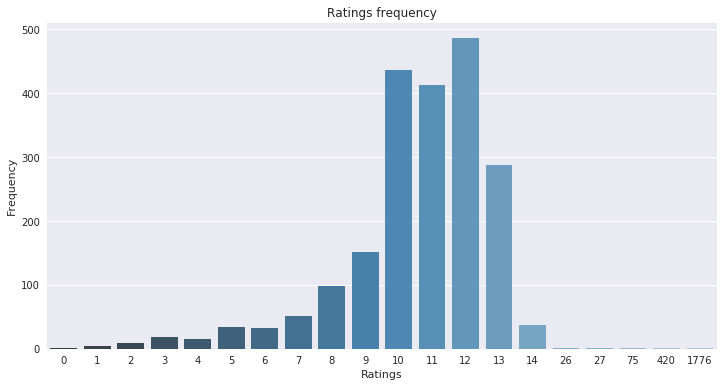

In [51]:
data = arch_count_pred['rate_num'].value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

let's have a look for the same distribution with box plot.

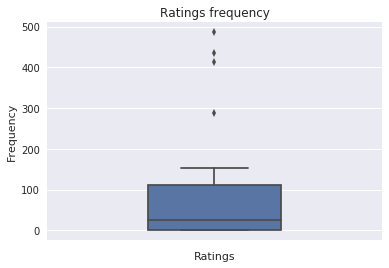

In [52]:
data = arch_count_pred['rate_num'].value_counts()

ax = sns.boxplot(data, orient='v', width=.4)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

Next we can look for the relation betwee 'retweet_count' and 'favorite_count'

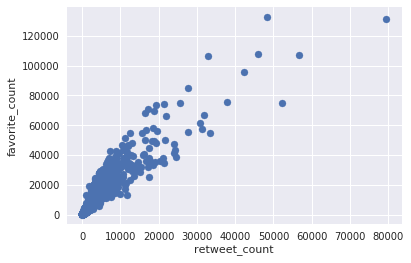

In [53]:
plt.scatter(arch_count_pred.retweet_count, arch_count_pred.favorite_count)
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.show()

As we can see the relation is highly postive correlated.

In [54]:
arch_count_pred.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

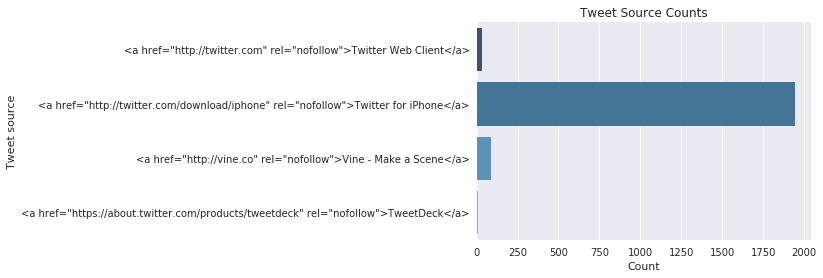

In [55]:
data = arch_count_pred.groupby('source').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Tweet source', title='Tweet Source Counts')
plt.show()